# CHECK DE HISTOGRAMA RMSD

In [1]:
import pandas as pd

In [13]:
rmsd = pd.read_pickle('../rmsd_7.pkl')[0].str[0].str[0]
cand_1 = pd.read_pickle('../rmsd_7.pkl')[0].str[0].str[1]
cand_2 = pd.read_pickle('../rmsd_7.pkl')[0].str[0].str[2]

In [26]:
df = pd.DataFrame([rmsd,cand_1,cand_2]).T
df.columns = ['rmsd', 'clq_1', 'clq_2']
df['rmsd'] = df.rmsd.astype(float)

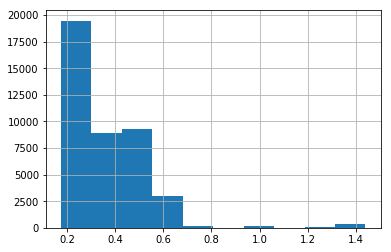

In [30]:
df.rmsd.hist()

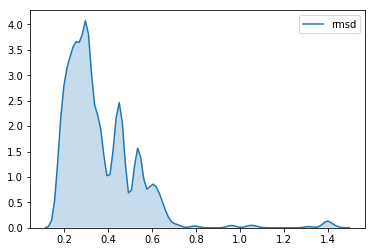

In [33]:
import seaborn as sns
sns.kdeplot(df.rmsd,shade=True)

In [34]:
import numpy as np
df.rmsd.describe(percentiles=np.linspace(0,1,11))

count    41448.000000
mean         0.364165
std          0.166044
min          0.175562
0%           0.175562
10%          0.213217
20%          0.236535
30.0%        0.265432
40%          0.297346
50%          0.311647
60.0%        0.355073
70%          0.431707
80%          0.459206
90%          0.548377
100%         1.438817
max          1.438817
Name: rmsd, dtype: float64

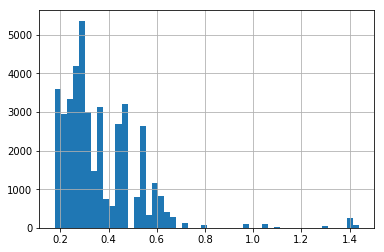

In [35]:
df.rmsd.hist(bins=50)

# CHECK SI RESPUESTA ESTA ENTRE LOS CANDIDATOS

In [70]:
c1 = [141,142,143,144,145,146,147,148,149,150,151]
c2 = [102,103,104,105,106,107,108,109,110,111,112]
for i,j in zip(df.clq_1, df.clq_2):
    if set(i).issubset(c1) and set(j).issubset(c2):
        print(i,j)

In [93]:
c1 = np.arange(106,139,1)
c2 = np.arange(134,170,1)
val = 0
for i,j in zip(df.clq_1, df.clq_2):
    
    try:
        if (i.index(110) == j.index(138)) and (i.index(111) == j.index(139)) and (i.index(106) == j.index(134)):
            print(i,j)
            val = val+1
    except ValueError:
        continue
        
val

[106, 107, 108, 105, 109, 111, 110] [134, 135, 136, 133, 137, 139, 138]
[106, 107, 108, 105, 110, 111, 109] [134, 135, 136, 133, 138, 139, 137]
[106, 107, 108, 105, 111, 109, 110] [134, 135, 136, 133, 139, 137, 138]
[106, 107, 108, 105, 111, 110, 109] [134, 135, 136, 133, 139, 138, 137]
[106, 107, 108, 109, 105, 111, 110] [134, 135, 136, 137, 133, 139, 138]
[106, 107, 108, 109, 112, 110, 111] [134, 135, 136, 137, 140, 138, 139]
[106, 107, 108, 109, 112, 111, 110] [134, 135, 136, 137, 140, 139, 138]
[106, 107, 108, 109, 110, 112, 111] [134, 135, 136, 137, 138, 140, 139]
[106, 107, 108, 109, 110, 111, 112] [134, 135, 136, 137, 138, 139, 140]
[106, 107, 108, 109, 111, 112, 110] [134, 135, 136, 137, 139, 140, 138]
[106, 107, 108, 109, 111, 110, 112] [134, 135, 136, 137, 139, 138, 140]
[106, 107, 108, 109, 111, 105, 110] [134, 135, 136, 137, 139, 133, 138]
[106, 107, 108, 110, 112, 109, 111] [134, 135, 136, 138, 140, 137, 139]
[106, 107, 108, 110, 112, 111, 109] [134, 135, 136, 138, 140, 13

312

## check de residuo mas grande

In [65]:
max_temp = 0
for i in df.clq_1:
    i = np.array(i, dtype=int)
    
    if max_temp < max(i):
        maximo = max(i)
        max_temp = maximo
        
max_temp

151

In [66]:
max_temp = 0
for i in df.clq_2:
    i = np.array(i, dtype=int)
    
    if max_temp < max(i):
        maximo = max(i)
        max_temp = maximo
        
max_temp

154

# Alineamiento residuo a residuo

In [98]:
df = pd.read_pickle('../parejas_alinear.pkl')

In [102]:
df

,0,1,2
0,"[141, 146, 144, 145, 147, 142, 143]","[130, 135, 133, 134, 136, 131, 132]","[[0.44053442416631977, -0.41017066494093546, 0..."
1,"[141, 146, 144, 145, 147, 143, 142]","[130, 135, 133, 134, 136, 132, 131]","[[0.44053442416631916, -0.41017066494093557, 0..."
2,"[141, 146, 144, 145, 142, 147, 143]","[130, 135, 133, 134, 131, 136, 132]","[[0.44053442416631916, -0.41017066494093557, 0..."
3,"[141, 146, 144, 145, 142, 143, 147]","[130, 135, 133, 134, 131, 132, 136]","[[0.4405344241663193, -0.41017066494093557, 0...."
4,"[141, 146, 144, 145, 143, 147, 142]","[130, 135, 133, 134, 132, 136, 131]","[[0.44053442416631916, -0.41017066494093557, 0..."
5,"[141, 146, 144, 145, 143, 142, 147]","[130, 135, 133, 134, 132, 131, 136]","[[0.4405344241663189, -0.41017066494093546, 0...."
6,"[141, 146, 144, 147, 145, 142, 143]","[130, 135, 133, 136, 134, 131, 132]","[[0.44053442416631916, -0.41017066494093557, 0..."
7,"[141, 146, 144, 147, 145, 143, 142]","[130, 135, 133, 136, 134, 132, 131]","[[0.44053442416631916, -0.41017066494093557, 0..."
8,"[141, 146, 144, 147, 142, 145, 143]","[130, 135, 133, 136, 131, 134, 132]","[[0.44053442416631916, -0.41017066494093557, 0..."
9,"[141, 146, 144, 147, 142, 143, 145]","[130, 135, 133, 136, 131, 132, 134]","[[0.44053442416631916, -0.41017066494093557, 0..."
